In [336]:
#Let's import everything I need

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

In [457]:
#Let's read the df

df = pd.read_csv('master.csv')


#Let's inspect how the df is with a simple head. 
df.head()

#Let's see if there are any null values and which columns are pretty empty

df.info() #based on this it seems HDI for year is pretty empty, let's remove it.
#I'll also remove suicides/100k pop as I have the number of suicides in the column "suicides_no"
#Lastly I'll remove country-year as I don't think I'll be using that

columns_to_drop = ['suicides/100k pop','HDI for year','country-year']
df2 = df.drop(columns_to_drop,axis = 1)

df2 #Let's check to see if everything dropped properly!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k pop    27820 non-null float64
country-year         27820 non-null object
HDI for year         8364 non-null float64
 gdp_for_year        27820 non-null object
gdp_per_capita       27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


,country,year,sex,age,suicides_no,population,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,"63,067,077,179",2309,Generation Z


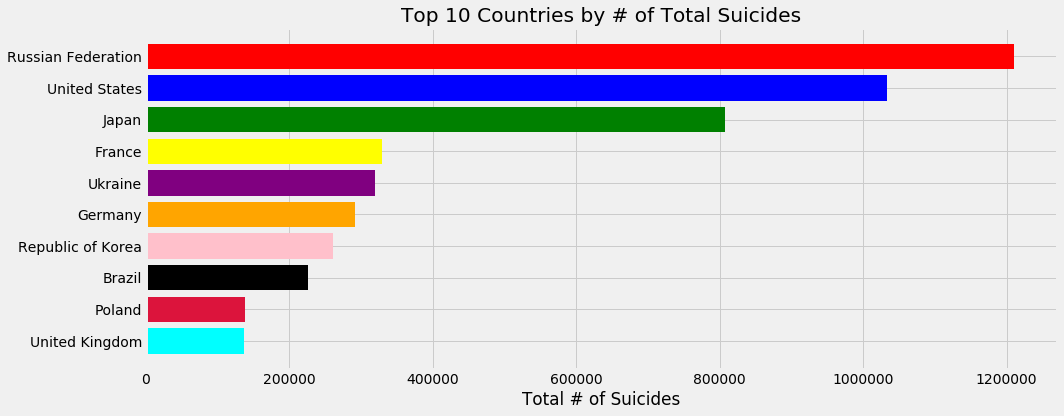

In [49]:
#Great, now that I've cleaned up the data to items I'm interested in. Let's plot analyze some items.
#Let's plot the top 10 countries by TOTAL number of suicides. This is the suicides_no column

#This code groups by country, sums their respective columns, sorts on suicides_no and retains the top 10 from df
total_suicides = df.groupby(['country']).sum().sort_values(['suicides_no'],ascending = False).head(10)

total_suicides.reset_index(inplace = True) #let's reset the index so I can get my country as a column

fig, ax = plt.subplots(figsize = (15,6))
colors = ['red','blue','green','yellow','purple','orange','pink','black','crimson','cyan']

ax.barh(total_suicides['country'],total_suicides['suicides_no'], color = colors)
ax.set_title('Top 10 Countries by # of Total Suicides')
ax.set_xlabel('Total # of Suicides')
ax.invert_yaxis() # I actually think it looks better inverted, let's invert it.

plt.tight_layout()
plt.show()

''''Great, so it looks like Russia has a real suicide issue. I'm a little bit surprised about Korea to be honest
as I thought they had a much higher suicide rate. Japan makes sense to me. '''

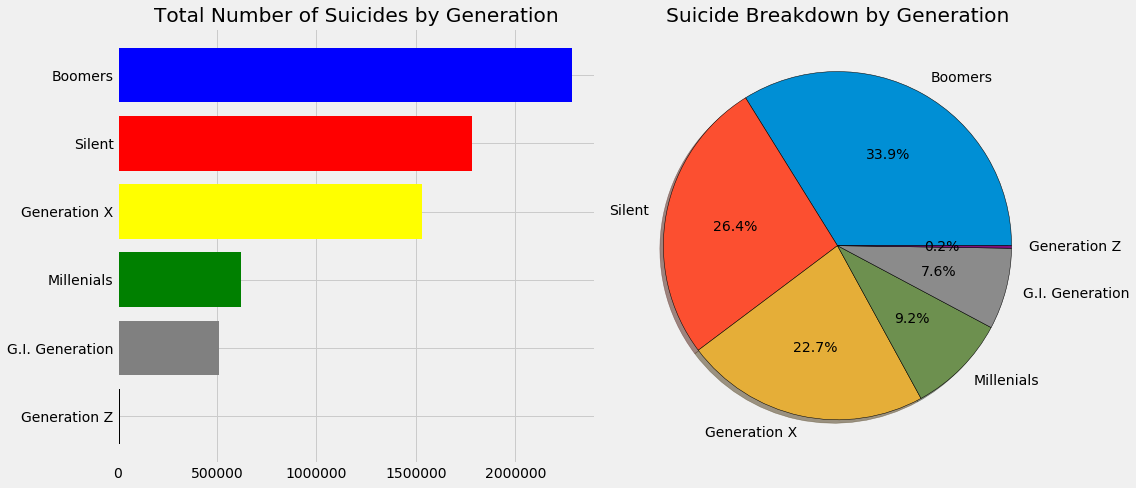

' Great so it seems like the generation with the most suicides are the boomers. On the other hand Gen z is \nvirtually 0 % this logically makes sense as the age range of people in that generation are either teens or young\nchildren.'

In [110]:
# Okay, let's see how the generation is broken down by total sucides a long with a pie chart of the % breakdown.

generation = df2.groupby(['generation']).sum().reset_index().sort_values(['suicides_no'],ascending = False)

fig,(ax1,ax2) = plt.subplots(ncols = 2, nrows = 1,figsize =  (16,7))

colors= ['blue','red','yellow','green','grey','black']
ax1.barh(generation['generation'],generation['suicides_no'],color = colors)
ax1.invert_yaxis()
ax1.set_title('Total Number of Suicides by Generation')


labels = list(generation['generation'])
ax2.pie(generation['suicides_no'],labels = labels,wedgeprops = {'edgecolor':'black'},
       shadow=True, autopct = '%1.1f%%')
ax2.set_title('Suicide Breakdown by Generation')

plt.tight_layout()
plt.show()

''' Great so it seems like the generation with the most suicides are the boomers. On the other hand Gen z is 
virtually 0 % this logically makes sense as the age range of people in that generation are either teens or young
children.'''

In [197]:
#Let's take a further look and make the split between gender and age group to see who has the most suicides.

#Let's group by generation and then sex

sex_age = df2.groupby(['age','sex']).sum().sort_values('age')
sex_age.drop(['year'],axis =1)

suicides_no  population  gdp_per_capita
age         sex                                            
15-24 years female       175437  4245159089        39170527
            male         633105  4397787807        39170527
25-34 years female       208823  4190523226        39170527
            male         915089  4247580361        39170527
35-54 years female       506233  7266872023        39170527
            male        1945908  7109016100        39170527
5-14 years  female        16997  4107939076        38759885
            male          35267  4290754161        38759885
55-74 years female       430036  4756740046        39170527
            male        1228407  4046505294        39170527
75+ years   female       221984  1705548397        39170527
            male         431134   957732856        39170527

,amin,amax,median,mean
country,,,,
Russian Federation,44,22338,1526.5,3733.771605
United States,50,11767,2193.0,2779.604839
Japan,12,8948,1641.0,2169.091398
Ukraine,6,5203,517.5,952.232143
Germany,5,3427,759.0,933.532051
France,2,3379,715.0,914.241667
Republic of Korea,8,4255,464.0,703.575269
Brazil,25,3238,348.0,609.174731
Poland,3,2430,261.0,482.979167


amin   amax  median         mean
country            generation                                       
Russian Federation Boomers           827  22338  3885.5  7848.750000
United States      Boomers          1059  11613  4383.0  5215.617647
Russian Federation Silent            953  12517  2121.5  3925.283784
                   Generation X       48  10304  1543.5  3823.736111
Japan              Silent           1509   8409  2576.0  3632.743902
                   Boomers           598   8948  2232.0  3550.294118
United States      Generation X       52  11767  2209.0  2883.000000
                   Silent            389   7287  2396.5  2792.329268
Japan              G.I. Generation  1258   4171  1710.0  2060.386364
United States      G.I. Generation   425   5500  1936.5  2042.386364
Ukraine            Boomers           176   5203  1099.5  1875.467742
Russian Federation G.I. Generation  1110   6401  1421.0  1846.392857
Germany            Boomers           350   3427  1333.5  1718.689655
France             Boomers           366   3379  1286.5  1669.287879
Russian Federation Millenials         65   6945   675.0  1661.361111
Japan              Generation X       17   7351  1043.0  1514.681818
United States      Millenials         50   5503   660.0  1444.888889
Germany            Silent            520   3302  1176.5  1426.152778
Ukraine            Silent            296   3821   748.5  1299.052632
France             Silent            424   2855  1163.0  1297.700000

sex,female,male
country,,
Russian Federation,214330,995412
United States,213797,820216
Japan,251630,555272
Ukraine,61377,258573
France,89419,239708


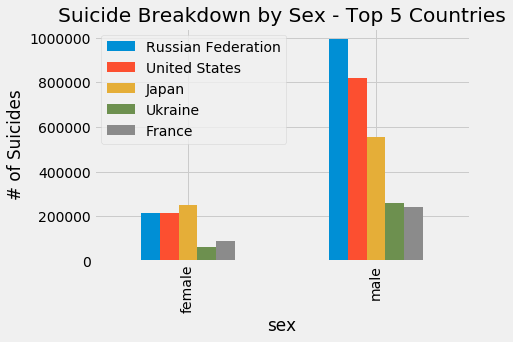

In [258]:
#Let's calculate some simple summary statistics that I learnt fromy my datacamp course

#np.mean, np.max,np.median
#value.counts(normalize = True)
#.agg(functions)
#pivot_table(values, index, columns, aggfunc, fill_value, margins = True)

#First let's calculate the numpy statistics on the suicides grouped by country
country_stats = df.groupby('country')['suicides_no'].agg([np.min,np.max,np.median,np.mean])
display(country_stats.sort_values(['mean'],ascending = False).head(20))

country_stats_generation = df.groupby(['country','generation'])['suicides_no'].agg([np.min,np.max,np.median,np.mean])
display(country_stats_generation.sort_values(['mean'],ascending = False).head(20))

sex_generation = df.groupby(['sex','generation'])['suicides_no'].agg([np.max,np.median,np.mean])
sex_generation.sort_values(['mean'], ascending = False)

#Let's create a pivot table using my data
#By Default this gets the mean 
piv = df.pivot_table(values = 'suicides_no',index = 'country',columns ='sex', fill_value =  0,
                     margins = False, aggfunc = np.sum)
piv = piv.sort_values(['male'],ascending = False).head(5)
display(piv)

#Let's plot the pivot table
ax = piv.T.plot(kind='bar')
ax.set_ylabel('# of Suicides')
ax.set_title('Suicide Breakdown by Sex - Top 5 Countries')

ax.legend()
plt.show()

piv2 = df.pivot_table(values = 'suicides_no' , index = 'sex', columns = 'generation', fill_value = 0, aggfunc =np.mean)

Text(0.5, 1.0, 'Suicide Breakdown by Sex')

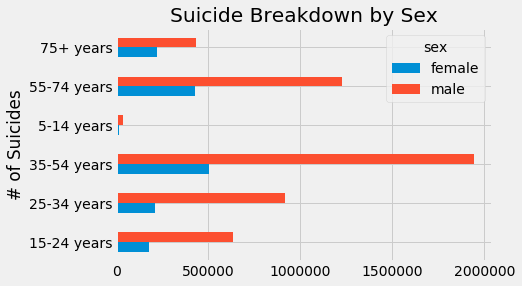

In [268]:
piv3 = df.pivot_table(values = 'suicides_no',index = 'sex', columns = 'age', fill_value = 0, aggfunc= np.sum)
piv3

#Let's plot the pivot table
ax = piv3.T.plot(kind='barh')
ax.set_ylabel('# of Suicides')
ax.set_title('Suicide Breakdown by Sex')

In [338]:
# List of characters to remove
chars_to_remove = ['']
# List of column names to clean
cols_to_clean = ['age']

# Loop for each column
#for col in cols_to_clean:
 #   # Replace each character with an empty string
  #  for char in chars_to_remove: 
   #     df[col] = df[col].str.replace(char,'')
#df

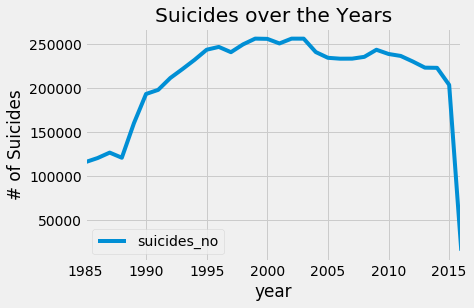

In [389]:
year_total = df.pivot_table(values = 'suicides_no',index = 'year', fill_value = 0, aggfunc= np.sum)

#Let's plot the pivot table
ax = year_total.plot(kind='line')
ax.set_ylabel('# of Suicides')
ax.set_title('Suicides over the Years')
plt.show()
#Let's remove the year 2015, as it's not really complete it seems

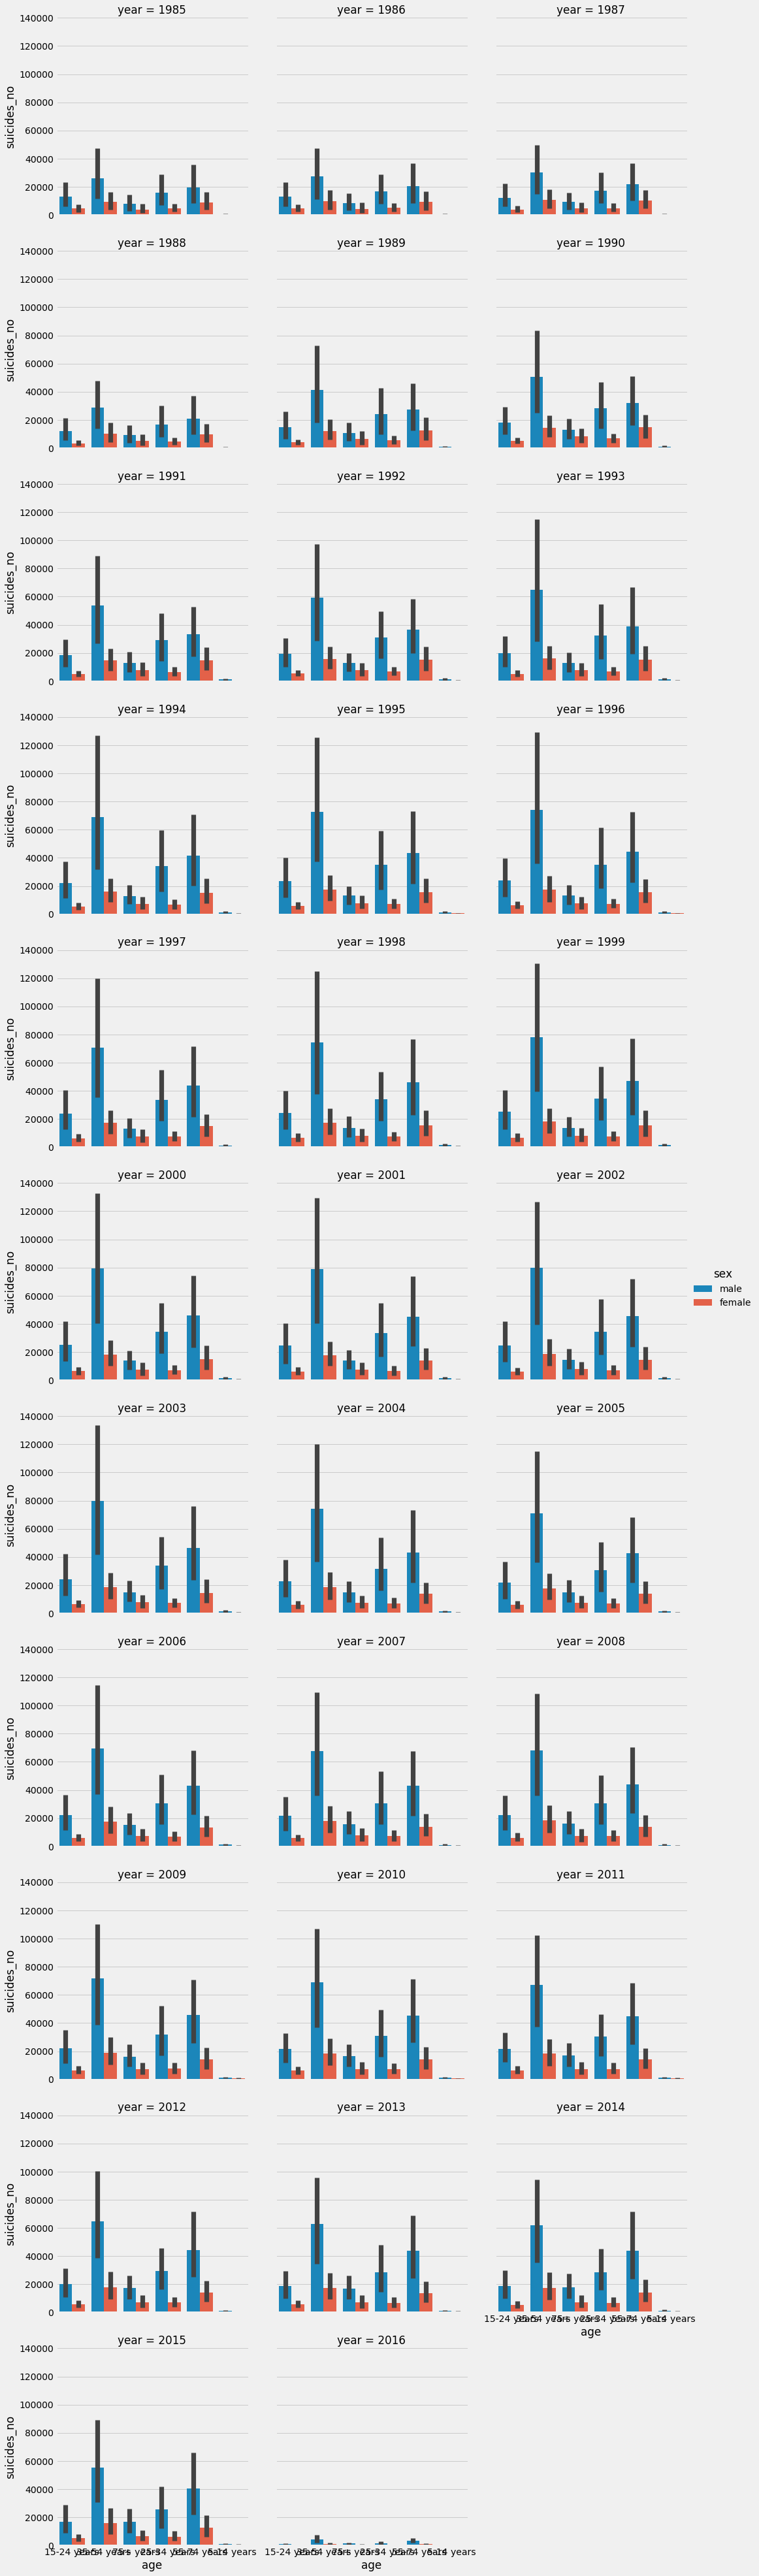

In [450]:
from numpy import median
import seaborn as sns
from numpy import sum

df.groupby(by=['age','sex'])['suicides_no'].sum().reset_index()

sns.catplot('age','suicides_no',hue='sex',col='year',data=df,kind='bar',col_wrap=3,estimator=sum)

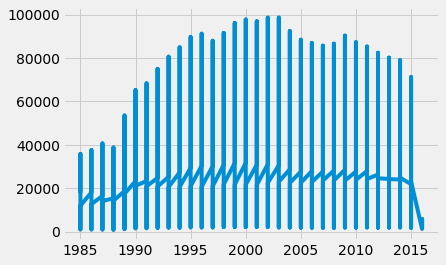

In [454]:
year_age = df.groupby(['year','age']).suicides_no.sum().reset_index()

#sns.lineplot('year','suicides_no',hue='age',style='age',data=year_age)

fig, ax = plt.subplots()